In [166]:
# Dependencies
import seaborn as sb
import pandas as pd
import matplotlib as plt

In [218]:
# Store filepath in a variable
file = "Officer_Traffic_Stops_Charlotte.csv"

In [219]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
file_df = pd.read_csv(file_one)

In [220]:
# Show just the header 
file_df.head()

,Month_of_Stop,Reason_for_Stop,Officer_Race,Officer_Gender,Officer_Years_of_Service,Driver_Race,Driver_Ethnicity,Driver_Gender,Driver_Age,Was_a_Search_Conducted,Result_of_Stop,CMPD_Division,ObjectID,CreationDate,Creator,EditDate,Editor
0,2017/04,Vehicle Equipment,Asian / Pacific Islander,Male,15,White,Non-Hispanic,Female,40,No,Verbal Warning,South Division,4001,2018-03-28T09:02:05.349Z,CharlotteNC,2018-03-28T09:02:05.349Z,CharlotteNC
1,2017/04,Speeding,Asian / Pacific Islander,Male,7,White,Non-Hispanic,Male,46,No,Verbal Warning,Providence Division,4002,2018-03-28T09:02:05.349Z,CharlotteNC,2018-03-28T09:02:05.349Z,CharlotteNC
2,2017/04,Vehicle Regulatory,White,Male,19,White,Non-Hispanic,Male,48,No,Citation Issued,Independence Division,4003,2018-03-28T09:02:05.349Z,CharlotteNC,2018-03-28T09:02:05.349Z,CharlotteNC
3,2017/04,Speeding,Hispanic/Latino,Male,3,White,Non-Hispanic,Female,54,No,Citation Issued,Providence Division,4004,2018-03-28T09:02:05.349Z,CharlotteNC,2018-03-28T09:02:05.349Z,CharlotteNC
4,2017/04,Stop Light/Sign,Hispanic/Latino,Female,3,Black,Non-Hispanic,Female,30,No,Verbal Warning,Westover Division,4005,2018-03-28T09:02:05.349Z,CharlotteNC,2018-03-28T09:02:05.349Z,CharlotteNC


In [237]:
data=file_df.iloc[:,0:12]
data.head()

,Month_of_Stop,Reason_for_Stop,Officer_Race,Officer_Gender,Officer_Years_of_Service,Driver_Race,Driver_Ethnicity,Driver_Gender,Driver_Age,Was_a_Search_Conducted,Result_of_Stop,CMPD_Division
0,2017/04,Vehicle Equipment,Asian / Pacific Islander,Male,15,White,Non-Hispanic,Female,40,No,Verbal Warning,South Division
1,2017/04,Speeding,Asian / Pacific Islander,Male,7,White,Non-Hispanic,Male,46,No,Verbal Warning,Providence Division
2,2017/04,Vehicle Regulatory,White,Male,19,White,Non-Hispanic,Male,48,No,Citation Issued,Independence Division
3,2017/04,Speeding,Hispanic/Latino,Male,3,White,Non-Hispanic,Female,54,No,Citation Issued,Providence Division
4,2017/04,Stop Light/Sign,Hispanic/Latino,Female,3,Black,Non-Hispanic,Female,30,No,Verbal Warning,Westover Division


In [228]:
data['Officer_Race'].value_counts()

White                             34766
Black/African American             8274
Asian / Pacific Islander           2862
Hispanic/Latino                    2207
                                    357
Not Specified                       233
American Indian/Alaska Native       134
2 or More                            51
Native Hawaiian/Oth Pac Island       36
Name: Officer_Race, dtype: int64

In [223]:
data['Reason_for_Stop'].value_counts()

Vehicle Regulatory           19238
Speeding                     12798
Vehicle Equipment             5706
Stop Light/Sign               5076
Safe Movement                 3125
Investigation                 1122
Other                         1113
SeatBelt                       520
CheckPoint                     154
Driving While Impaired          68
Name: Reason_for_Stop, dtype: int64

In [46]:
data['Was_a_Search_Conducted'].value_counts()

No     46758
Yes     2162
Name: Was_a_Search_Conducted, dtype: int64

In [238]:
#Map categorical values
#wcdict = {'Yes':1,'No':1}
#data_new = data.applymap(lambda s: wcdict.get(s) if s in wcdict else s)
#data_new.head()
data['Month']=data['Month_of_Stop'].apply(lambda x: int(str(x)[-2:]))
data.head()

,Month_of_Stop,Reason_for_Stop,Officer_Race,Officer_Gender,Officer_Years_of_Service,Driver_Race,Driver_Ethnicity,Driver_Gender,Driver_Age,Was_a_Search_Conducted,Result_of_Stop,CMPD_Division,Month
0,2017/04,Vehicle Equipment,Asian / Pacific Islander,Male,15,White,Non-Hispanic,Female,40,No,Verbal Warning,South Division,4
1,2017/04,Speeding,Asian / Pacific Islander,Male,7,White,Non-Hispanic,Male,46,No,Verbal Warning,Providence Division,4
2,2017/04,Vehicle Regulatory,White,Male,19,White,Non-Hispanic,Male,48,No,Citation Issued,Independence Division,4
3,2017/04,Speeding,Hispanic/Latino,Male,3,White,Non-Hispanic,Female,54,No,Citation Issued,Providence Division,4
4,2017/04,Stop Light/Sign,Hispanic/Latino,Female,3,Black,Non-Hispanic,Female,30,No,Verbal Warning,Westover Division,4


In [53]:
data['Was_a_Search_Conducted']=

,Reason_for_Stop,Officer_Race,Officer_Gender,Officer_Years_of_Service,Driver_Race,Driver_Ethnicity,Driver_Gender,Driver_Age,Was_a_Search_Conducted,Result_of_Stop,CMPD_Division
0,Vehicle Equipment,Asian / Pacific Islander,Male,15,White,Non-Hispanic,Female,40,1,Verbal Warning,South Division
1,Speeding,Asian / Pacific Islander,Male,7,White,Non-Hispanic,Male,46,1,Verbal Warning,Providence Division
2,Vehicle Regulatory,White,Male,19,White,Non-Hispanic,Male,48,1,Citation Issued,Independence Division
3,Speeding,Hispanic/Latino,Male,3,White,Non-Hispanic,Female,54,1,Citation Issued,Providence Division
4,Stop Light/Sign,Hispanic/Latino,Female,3,Black,Non-Hispanic,Female,30,1,Verbal Warning,Westover Division


In [109]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Officer_Race'])
ct

Officer_Race,,2 or More,American Indian/Alaska Native,Asian / Pacific Islander,Black/African American,Hispanic/Latino,Native Hawaiian/Oth Pac Island,Not Specified,White
Reason_for_Stop,,,,,,,,,
CheckPoint,0,0,0,18,17,9,0,0,110
Driving While Impaired,0,0,0,8,1,6,0,1,52
Investigation,3,0,1,77,153,46,1,11,830
Other,5,0,2,51,153,37,0,3,862
Safe Movement,33,3,9,132,673,154,0,10,2111
SeatBelt,5,0,0,43,75,24,0,2,371
Speeding,151,3,8,1036,2449,390,0,11,8750
Stop Light/Sign,37,4,10,241,992,193,0,19,3580
Vehicle Equipment,18,5,23,379,707,327,4,37,4206


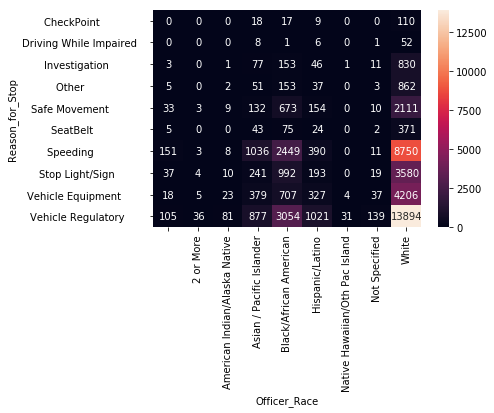

In [269]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Officer_Race'])
sb.heatmap(ct,annot=True,fmt='')

# Observation - vast majority of stops by White officers

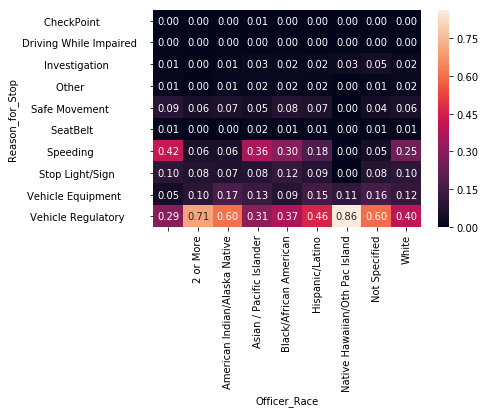

In [272]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Officer_Race'],normalize='columns')
sb.heatmap(ct,annot=True,fmt='.2f')

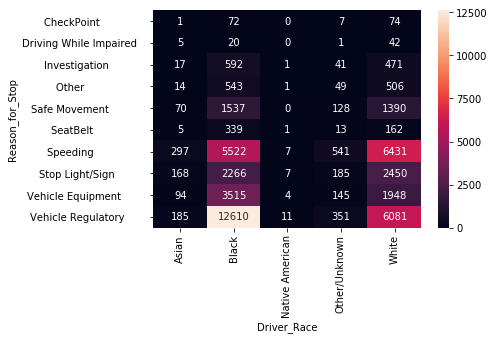

In [216]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Driver_Race'])
sb.heatmap(ct,annot=True,fmt='')

# Observation - most stops - Black drivers, regulatory

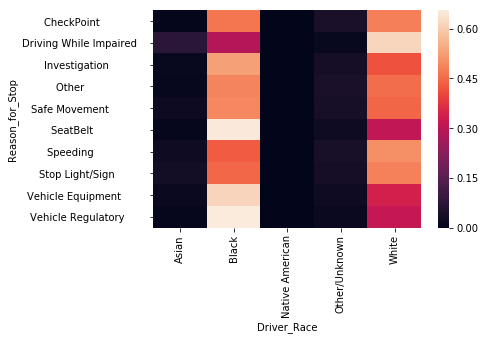

In [217]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Driver_Race'], normalize='index')
sb.heatmap(ct)

# Observation -  seatbelt, equipment, regulatory - Black drivers more often
# Observation - DUI -White drivers more often  

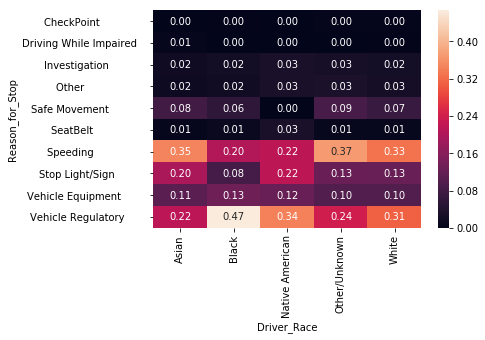

In [273]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Driver_Race'], normalize='columns')
sb.heatmap(ct,annot=True,fmt='.2f')

# Observation - Black drivers stopped primarily for: vehicle refulatory

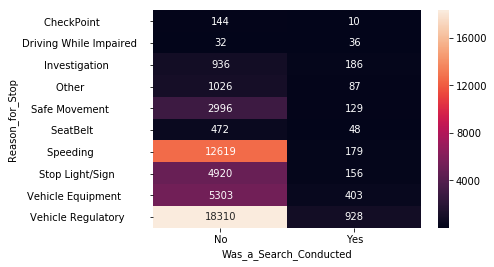

In [210]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Was_a_Search_Conducted'])
sb.heatmap(ct,annot=True,fmt='')

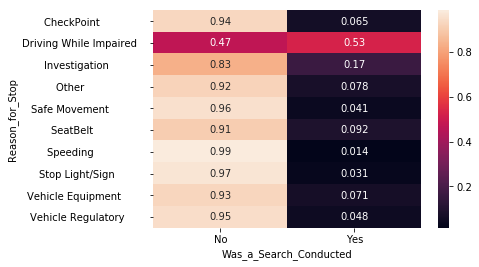

In [179]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Was_a_Search_Conducted'],normalize='index')
sb.heatmap(ct,annot=True)

# Observation - Search on DUI stop - 53/47


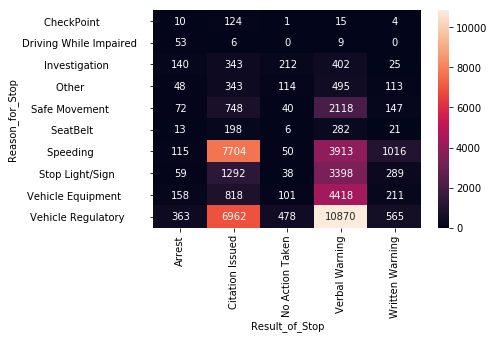

In [249]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Result_of_Stop'])
sb.heatmap(ct,annot=True,fmt='')

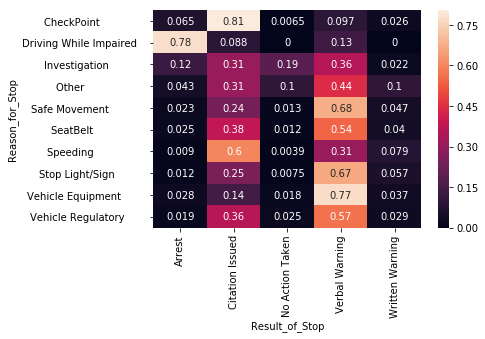

In [208]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Result_of_Stop'],normalize='index')
sb.heatmap(ct,annot=True)

# Observation - Speeding - citation in 60% cases. DUI -  arrest in 78%

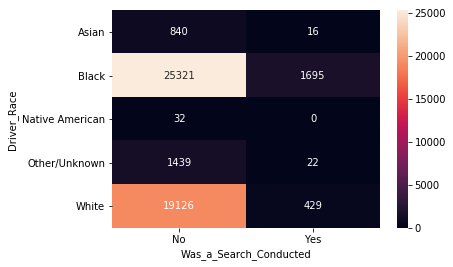

In [274]:
ct=pd.crosstab(data['Driver_Race'],data['Was_a_Search_Conducted'])
sb.heatmap(ct,annot=True,fmt='')

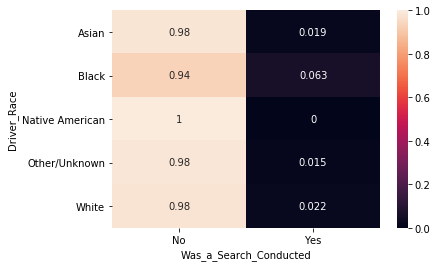

In [181]:
ct=pd.crosstab(data['Driver_Race'],data['Was_a_Search_Conducted'],normalize='index')
sb.heatmap(ct,annot=True)

# Observation - Female officers conduct search as often as male. Male drivers get searched more often

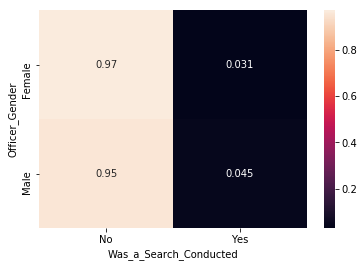

In [182]:
ct=pd.crosstab(data['Officer_Gender'],data['Was_a_Search_Conducted'],normalize='index')
sb.heatmap(ct,annot=True)

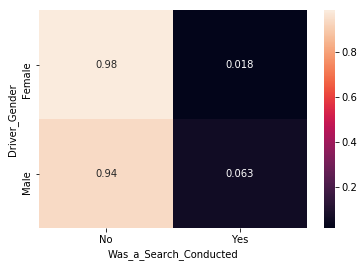

In [183]:
ct=pd.crosstab(data['Driver_Gender'],data['Was_a_Search_Conducted'],normalize='index')
sb.heatmap(ct,annot=True)

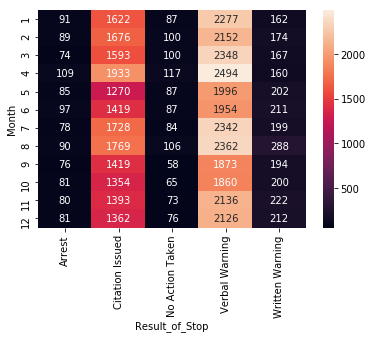

In [275]:
ct=pd.crosstab(data['Month'],data['Result_of_Stop'])
sb.heatmap(ct,annot=True,fmt='')

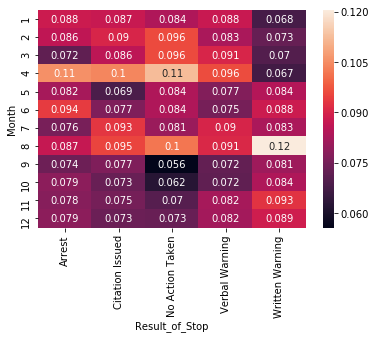

In [244]:
ct=pd.crosstab(data['Month'],data['Result_of_Stop'],normalize='columns')
sb.heatmap(ct,annot=True)

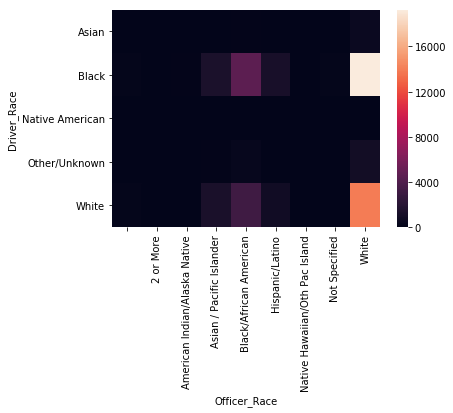

In [233]:
ct=pd.crosstab(data['Driver_Race'],data['Officer_Race'])
sb.heatmap(ct)

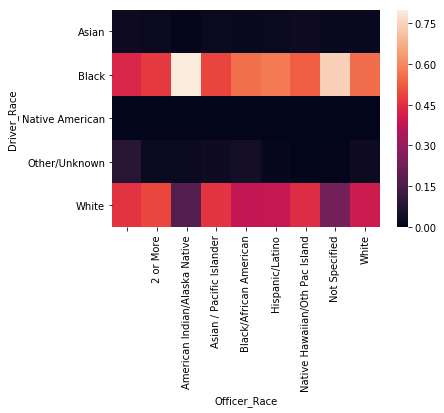

In [131]:
ct=pd.crosstab(data['Driver_Race'],data['Officer_Race'],normalize='columns')
sb.heatmap(ct)

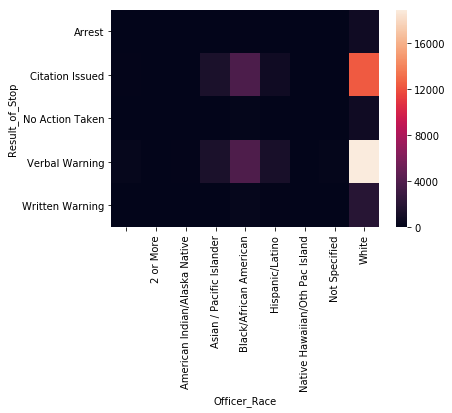

In [77]:
ct=pd.crosstab(data['Result_of_Stop'],data['Officer_Race'])
sb.heatmap(ct)

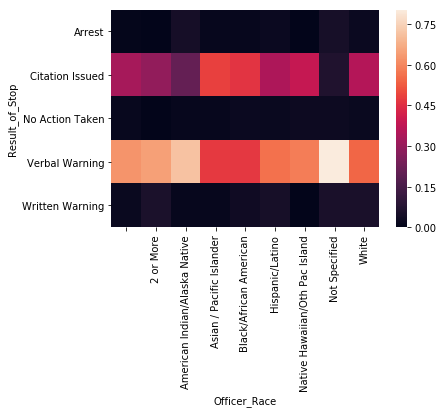

In [132]:
ct=pd.crosstab(data['Result_of_Stop'],data['Officer_Race'], normalize='columns')
sb.heatmap(ct)

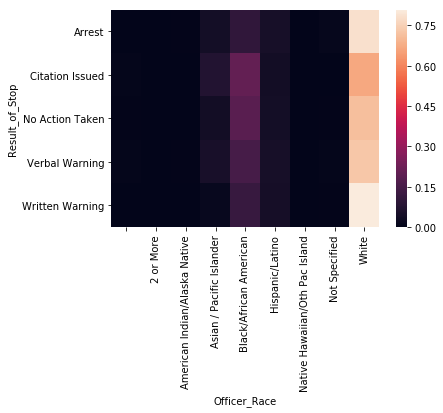

In [133]:
ct=pd.crosstab(data['Result_of_Stop'],data['Officer_Race'], normalize='index')
sb.heatmap(ct)

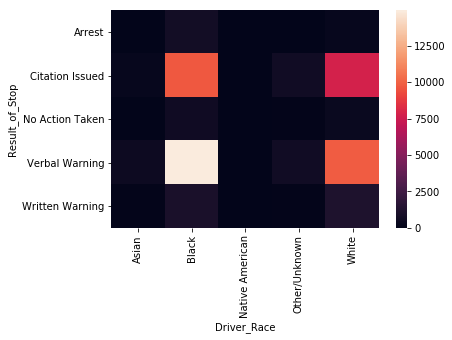

In [78]:
ct=pd.crosstab(data['Result_of_Stop'],data['Driver_Race'])
sb.heatmap(ct)

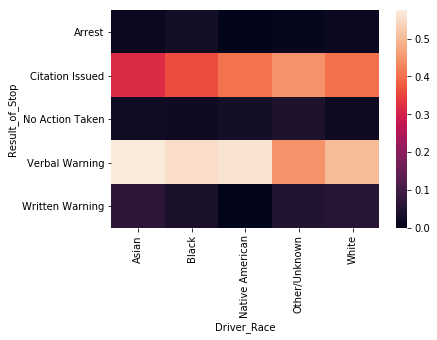

In [134]:
ct=pd.crosstab(data['Result_of_Stop'],data['Driver_Race'], normalize='columns')
sb.heatmap(ct)

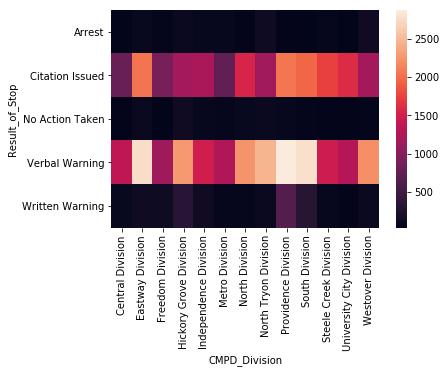

In [79]:
ct=pd.crosstab(data['Result_of_Stop'],data['CMPD_Division'])
sb.heatmap(ct)

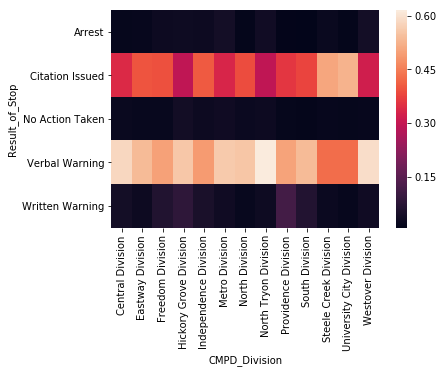

In [135]:
ct=pd.crosstab(data['Result_of_Stop'],data['CMPD_Division'],normalize='columns')
sb.heatmap(ct)

# Observation - South and Providence Division does most the speeding tickets and more often than others. North Tryon does regulatory a lot and often

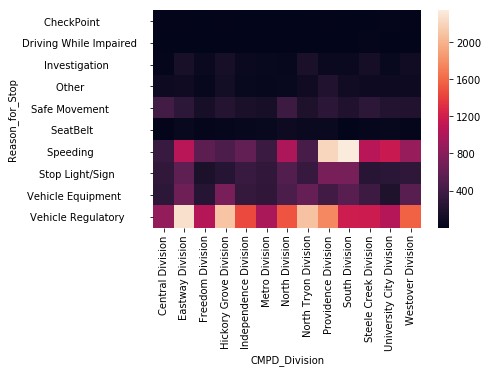

In [286]:
ct=pd.crosstab(data['Reason_for_Stop'],data['CMPD_Division'])
sb.heatmap(ct)

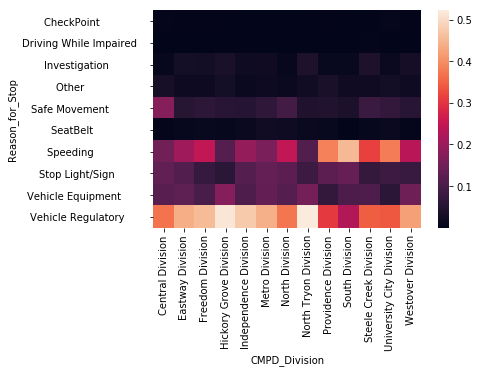

In [136]:
ct=pd.crosstab(data['Reason_for_Stop'],data['CMPD_Division'],normalize='columns')
sb.heatmap(ct)

# Observation - Metro division stops Black more often. South and Providence divisions stop most and most often White.

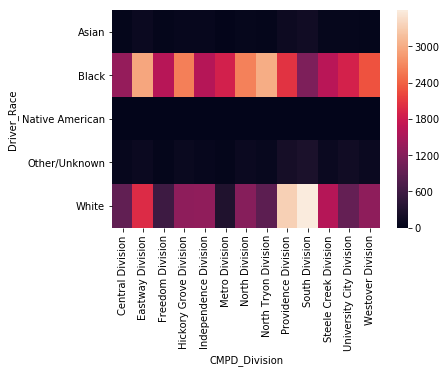

In [80]:
ct=pd.crosstab(data['Driver_Race'],data['CMPD_Division'])
sb.heatmap(ct)

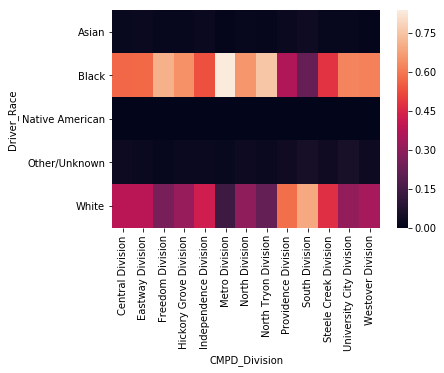

In [137]:
ct=pd.crosstab(data['Driver_Race'],data['CMPD_Division'], normalize='columns')
sb.heatmap(ct)

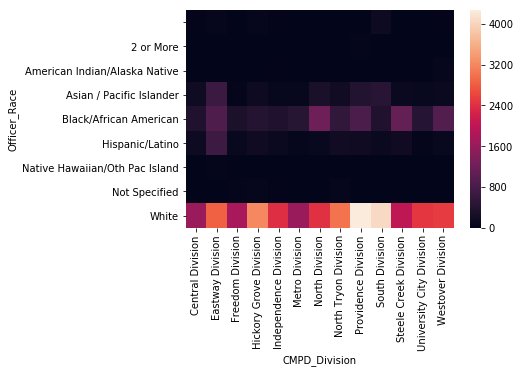

In [139]:
ct=pd.crosstab(data['Officer_Race'],data['CMPD_Division'])
sb.heatmap(ct)

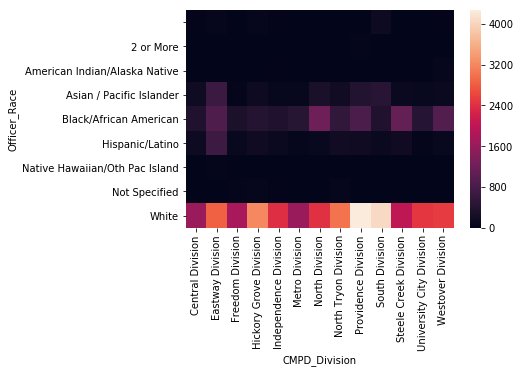

In [199]:
ct=pd.crosstab(data['Officer_Race'],data['CMPD_Division'])
sb.heatmap(ct)

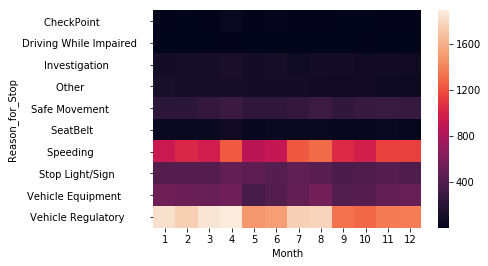

In [201]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Month'])
sb.heatmap(ct)

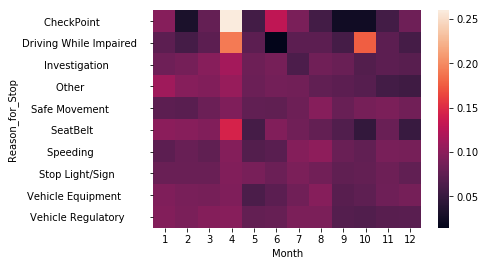

In [205]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Month'],normalize='index')
sb.heatmap(ct)

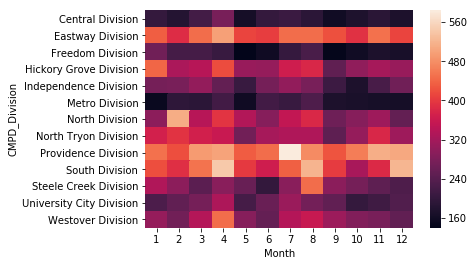

In [297]:
ct=pd.crosstab(data['CMPD_Division'],data['Month'])
sb.heatmap(ct)

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

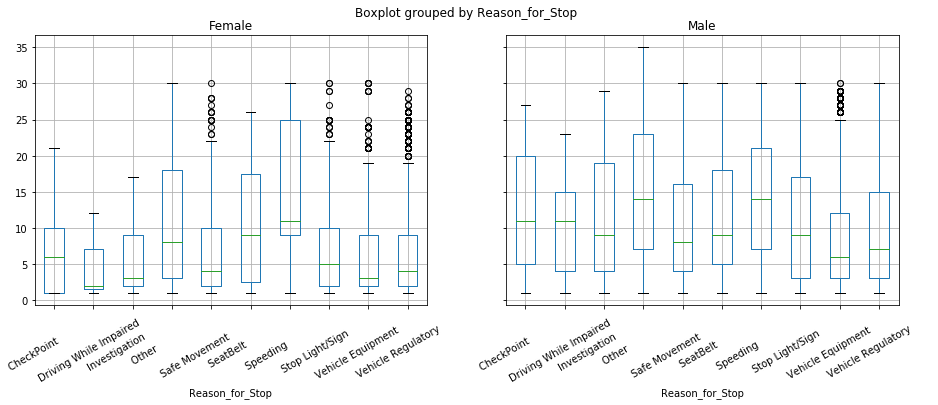

In [140]:
data.groupby('Officer_Gender').boxplot(column='Officer_Years_of_Service', by='Reason_for_Stop',rot=30, figsize=(15,5))

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

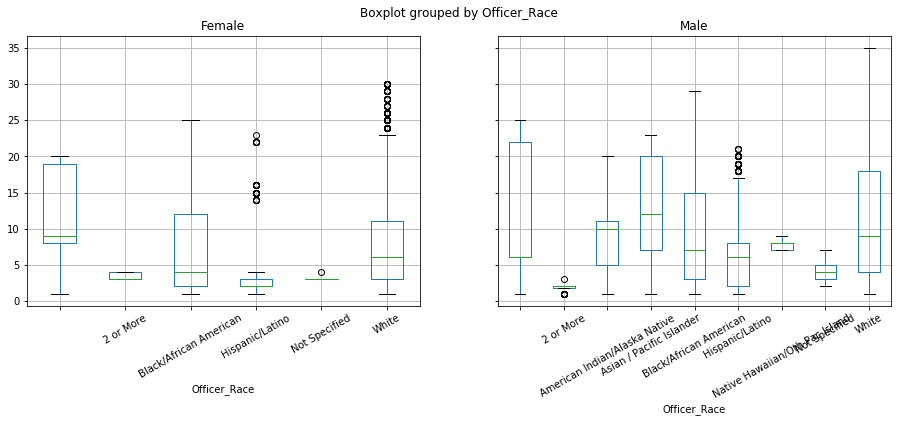

In [143]:
data.groupby('Officer_Gender').boxplot(column='Officer_Years_of_Service', by='Officer_Race',rot=30,figsize=(15,5))

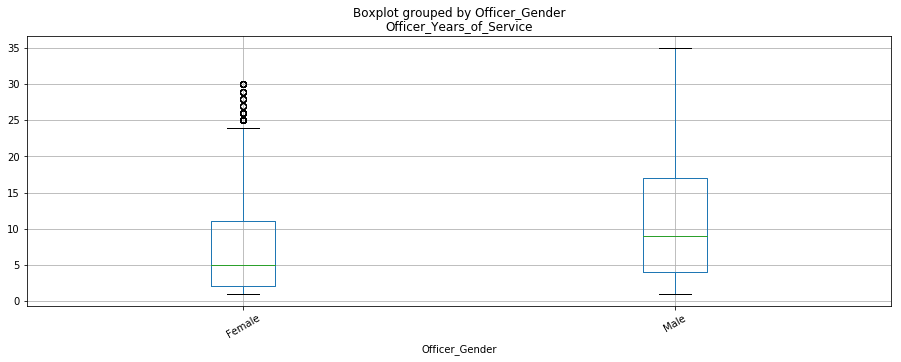

In [101]:
data.boxplot(column='Officer_Years_of_Service', by='Officer_Gender', rot=30,figsize=(15,5))

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

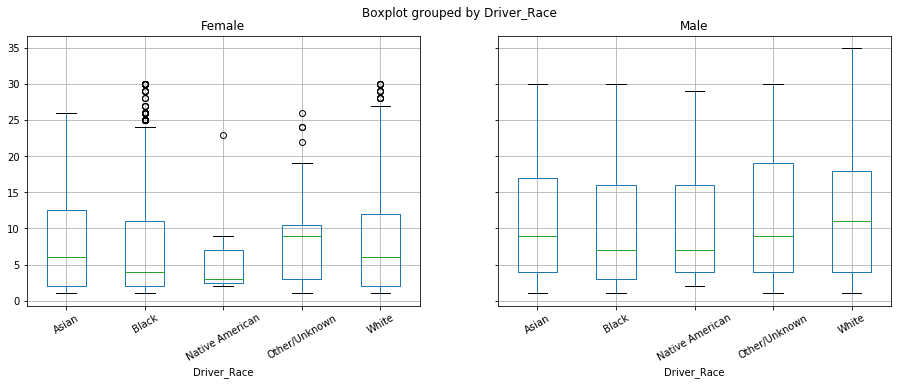

In [187]:
data.groupby('Officer_Gender').boxplot(column='Officer_Years_of_Service', by='Driver_Race', rot=30,figsize=(15,5))

# Observation - Officers get "kinder" with experience, men get "kinder" than women.
# Observation - Arrests are conducted by officers with less years of service

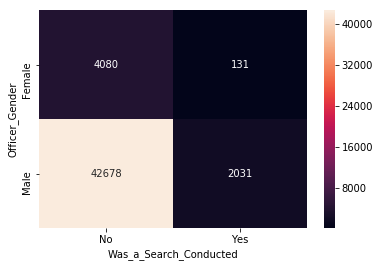

In [289]:
ct=pd.crosstab(data['Officer_Gender'],data['Was_a_Search_Conducted'])
sb.heatmap(ct, annot=True, fmt='')

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

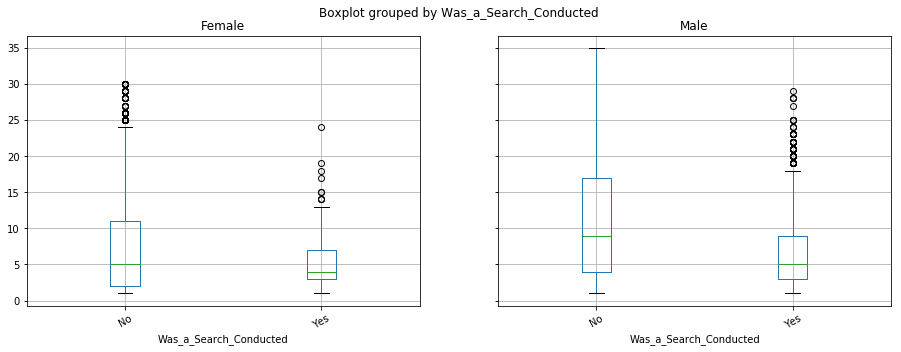

In [146]:
data.groupby('Officer_Gender').boxplot(column='Officer_Years_of_Service', by='Was_a_Search_Conducted', rot=30,figsize=(15,5))

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

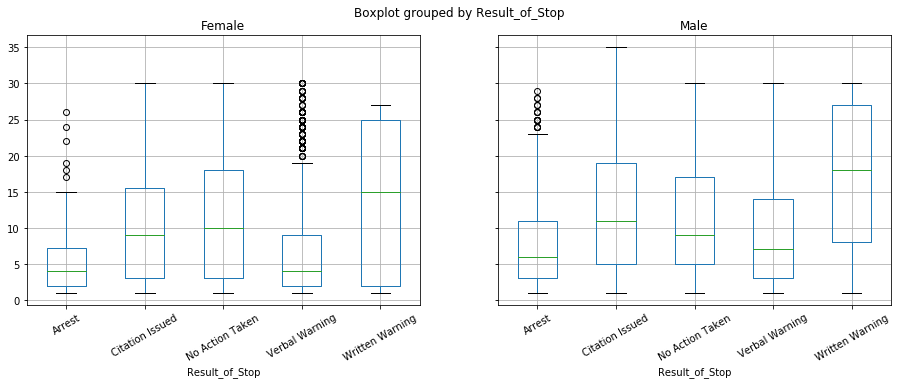

In [147]:
data.groupby('Officer_Gender').boxplot(column='Officer_Years_of_Service', by='Result_of_Stop', rot=30,figsize=(15,5))

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

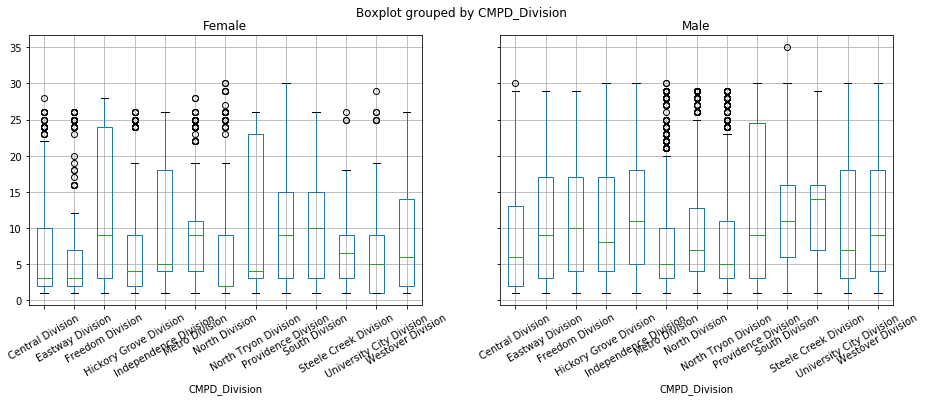

In [148]:
data.groupby('Officer_Gender').boxplot(column='Officer_Years_of_Service', by='CMPD_Division', rot=30,figsize=(15,5))

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

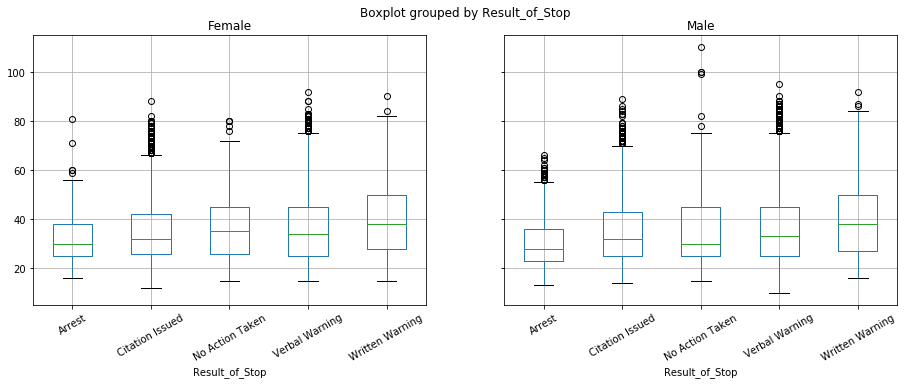

In [293]:
data.groupby('Driver_Gender').boxplot(column='Driver_Age', by='Result_of_Stop', rot=30,figsize=(15,5))

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

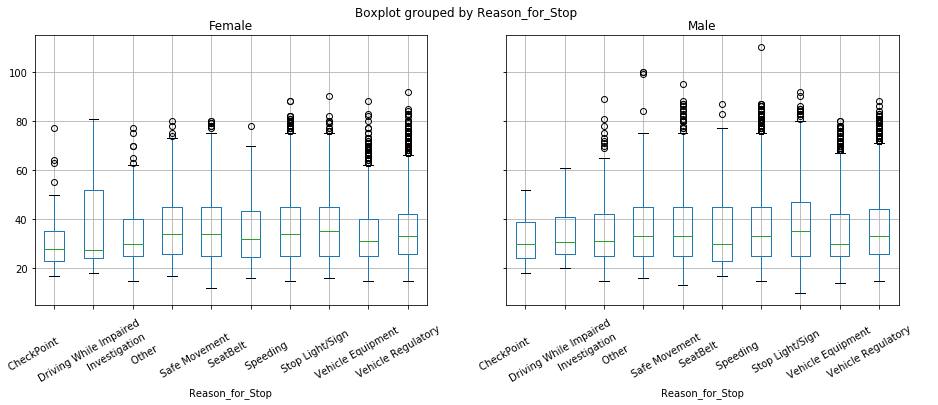

In [295]:
data.groupby('Driver_Gender').boxplot(column='Driver_Age', by='Reason_for_Stop', rot=30,figsize=(15,5))

# DUI - more women in 40s and older get stopped, than man

In [85]:
file_df.nunique()

Month_of_Stop                  24
Reason_for_Stop                10
Officer_Race                    9
Officer_Gender                  2
Officer_Years_of_Service       31
Driver_Race                     5
Driver_Ethnicity                2
Driver_Gender                   2
Driver_Age                     85
Was_a_Search_Conducted          2
Result_of_Stop                  5
CMPD_Division                  13
ObjectID                    48920
CreationDate                    1
Creator                         1
EditDate                        1
Editor                          1
dtype: int64

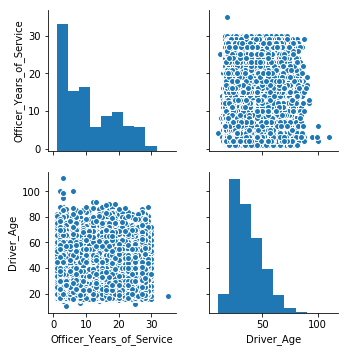

In [74]:
sb.pairplot(data)